# Introduction

Language identification is the task of automatically determining the language of a given text, essential for applications like machine translation, multilingual document tracking, and enhancing user experiences on electronic devices. This project focuses on developing a model to accurately identify languages, leveraging advanced algorithms and diverse datasets to handle the challenges posed by short texts and similar linguistic patterns.

# LIBRARY REQUIRED:

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# data collection:

## Dataset Description

The dataset used for this project is in a CSV format with two primary columns:

* Text: This column contains the input text samples, which can vary in length from single words to complete sentences. The text spans multiple languages, offering a diverse range of linguistic structures and features.

* Language: This column indicates the language label for the corresponding text. Each label represents a unique language, ensuring a supervised learning approach for training the model.

In [32]:
df = pd.read_csv(".\LingualSense_dataset[1].csv")
df.info()

<>:1: SyntaxWarning: invalid escape sequence '\L'
<>:1: SyntaxWarning: invalid escape sequence '\L'
C:\Users\sakth\AppData\Local\Temp\ipykernel_15856\1880852775.py:1: SyntaxWarning: invalid escape sequence '\L'
  df = pd.read_csv(".\LingualSense_dataset[1].csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32336 entries, 0 to 32335
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      32336 non-null  object
 1   Language  32336 non-null  object
dtypes: object(2)
memory usage: 505.4+ KB


# data info:

In [33]:
print("\nFirst Few Rows:")
print(df.head(10))


First Few Rows:
                                                Text  Language
0  Klement gottwaldi surnukeha palsameeriti ning ...  Estonian
1  sebes joseph pereira thomas  på eng the jesuit...   Swedish
2  ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...      Thai
3  விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...     Tamil
4  de spons behoort tot het geslacht haliclona en...     Dutch
5  エノが行きがかりでバスに乗ってしまい、気分が悪くなった際に助けるが、今すぐバスを降りたいと運...  Japanese
6  tsutinalar i̇ngilizce tsuutina kanadada albert...   Turkish
7  müller mox figura centralis circulorum doctoru...     Latin
8  برقی بار electric charge تمام زیرجوہری ذرات کی...      Urdu
9  シャーリー・フィールドは、サン・ベルナルド・アベニュー沿い市民センターとrtマーティン高校に...  Japanese


In [34]:
df.describe()

,Text,Language
count,32336,32336
unique,32116,30
top,haec commentatio automatice praeparata res ast...,English
freq,48,2385


# Check for Missing Values

In [35]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Text        0
Language    0
dtype: int64


In [36]:
 # Handle Missing Values
df['Text'] = df['Text'].fillna("Unknown")
df = df.dropna(subset=['Language'])

# Duplicate in dataset

## Checking for Duplicate

In [37]:
print("\nDuplicate Entries:")
duplicates = df[df.duplicated()]
duplicates.head(10)


Duplicate Entries:


,Text,Language
410,bisby fa roskov yr orrell tm nicolson d paglin...,Indonesian
581,haec commentatio automatice praeparata res ast...,Latin
1012,haec commentatio automatice praeparata res ast...,Latin
1027,bisby fa roskov yr orrell tm nicolson d paglin...,Indonesian
1460,haec commentatio automatice praeparata res ast...,Latin
1594,haec commentatio automatice praeparata res ast...,Latin
1792,இக்கோயில் முதன்மைத் திருக்கோயில் என்ற வகைப்பாட...,Tamil
1878,haec commentatio automatice praeparata res ast...,Latin
2134,haec commentatio automatice praeparata res ast...,Latin
2159,haec commentatio automatice praeparata res ast...,Latin


In [38]:
print(f"\nDuplicate Count:{len(duplicates)}")


Duplicate Count:212


## Handle Duplicates

In [42]:
# removing Duplicates
df = df.drop_duplicates()

In [43]:
print("\nDuplicate Entries:")
duplicates = df[df.duplicated()]
duplicates.head(10)


Duplicate Entries:


,Text,Language


In [44]:
print(f"\nDuplicate Count:{len(duplicates)}")


Duplicate Count:0


# Clean Texts:

In [45]:
def clean_text(text):
    """
    Cleans the input text by:
    - Removing backslashes.
    - Replacing line breaks with a space.
    - Removing numeric characters.
    - Removing special characters and punctuations while preserving alphabetic characters (including Unicode letters) and spaces.
    - Reducing multiple spaces to a single space.
    - Stripping leading and trailing spaces.
    """
    # Keep only alphabetic characters (including non-English Unicode letters) and spaces
    text = re.sub(r'\\', '', text) # Remove blackslashes
    text = re.sub(r'\n', ' ', text) # Remove line breaks with a space
    text = re.sub(r'\d+', ' ', text) # Remove multiple space with a single space
    text = re.sub(r'[^\w\s]', '', text, flags=re.UNICODE)  # Remove special characters and punctuations
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

In [46]:
df['Text'] = df['Text'].apply(clean_text)

In [47]:
print(df.head(10))

                                                Text  Language
0  Klement gottwaldi surnukeha palsameeriti ning ...  Estonian
1  sebes joseph pereira thomas på eng the jesuits...   Swedish
2  ถนนเจรญกรง อกษรโรมน thanon charoen krung เรมตง...      Thai
3  வசகபபடடனம தமழசசஙகதத இநதப பததரகவசகபபடடன ஆசரயர ச...     Tamil
4  de spons behoort tot het geslacht haliclona en...     Dutch
5  エノが行きがかりでバスに乗ってしまい気分が悪くなった際に助けるが今すぐバスを降りたいと運転手...  Japanese
6  tsutinalar ingilizce tsuutina kanadada alberta...   Turkish
7  müller mox figura centralis circulorum doctoru...     Latin
8  برقی بار electric charge تمام زیرجوہری ذرات کی...      Urdu
9  シャーリーフィールドはサンベルナルドアベニュー沿い市民センターとrtマーティン高校に隣接して...  Japanese


# Convert Text to Lowercase:

In [48]:
df['Text'] = df['Text'].str.lower()

In [49]:
print(df.head(10))

                                                Text  Language
0  klement gottwaldi surnukeha palsameeriti ning ...  Estonian
1  sebes joseph pereira thomas på eng the jesuits...   Swedish
2  ถนนเจรญกรง อกษรโรมน thanon charoen krung เรมตง...      Thai
3  வசகபபடடனம தமழசசஙகதத இநதப பததரகவசகபபடடன ஆசரயர ச...     Tamil
4  de spons behoort tot het geslacht haliclona en...     Dutch
5  エノが行きがかりでバスに乗ってしまい気分が悪くなった際に助けるが今すぐバスを降りたいと運転手...  Japanese
6  tsutinalar ingilizce tsuutina kanadada alberta...   Turkish
7  müller mox figura centralis circulorum doctoru...     Latin
8  برقی بار electric charge تمام زیرجوہری ذرات کی...      Urdu
9  シャーリーフィールドはサンベルナルドアベニュー沿い市民センターとrtマーティン高校に隣接して...  Japanese


# EDA

## Number of language

In [50]:
# 4. number of language
language_counts = df['Language'].value_counts()
print("\nLanguage Counts:", len(language_counts))
print(language_counts)


Language Counts: 30
Language
English       2382
French        1997
Spanish       1810
Russian       1687
Dutch         1538
Arabic        1530
Turkish       1468
Tamil         1445
Hindi         1051
Chinese       1000
Korean        1000
Urdu          1000
Thai          1000
Japanese      1000
Romanian      1000
Persian       1000
Estonian       999
Portugese      997
Pushto         993
Swedish        992
Indonesian     975
Latin          953
Portugeese     736
Italian        694
Sweedish       673
Malayalam      591
German         465
Danish         424
Kannada        366
Greek          358
Name: count, dtype: int64


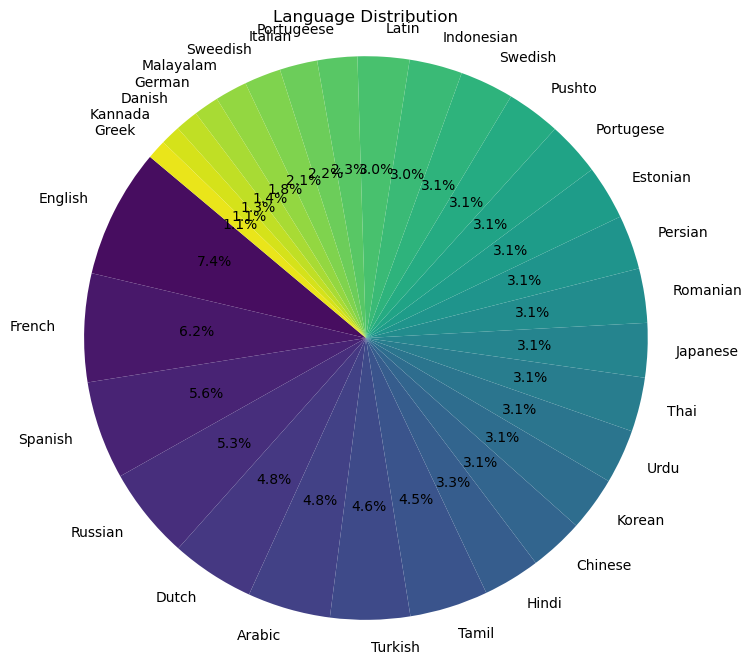

In [51]:
# Pie Chart for Language Distribution
plt.figure(figsize=(8, 8))
plt.pie(language_counts.values, labels=language_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(language_counts)))
plt.title("Language Distribution")
plt.axis('equal')  # Ensures the pie chart is a circle
plt.show()

C:\Users\sakth\AppData\Local\Temp\ipykernel_15856\2008268477.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_counts.index, y=language_counts.values, palette="viridis")


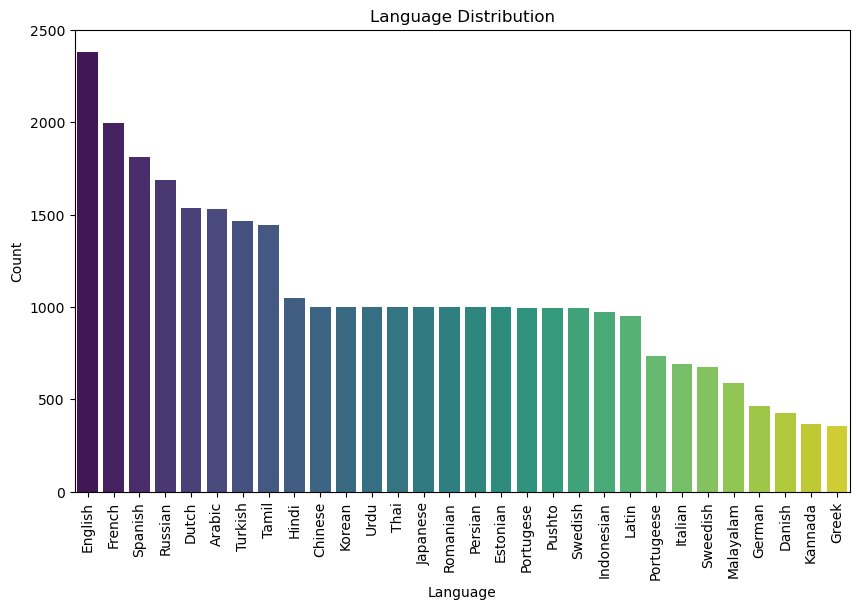

In [52]:
plt.figure(figsize=(10, 6))
sns.barplot(x=language_counts.index, y=language_counts.values, palette="viridis")
plt.title("Language Distribution")
plt.xlabel("Language")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

## Word Count in Text

In [53]:
# Word Count in Text
df['word_count'] = df['Text'].apply(lambda x: len(str(x).split()))
print("\nWord Count Statistics:")
print(df['word_count'].describe())


Word Count Statistics:
count    32124.000000
mean        42.142541
std         43.808051
min          0.000000
25%         16.000000
50%         30.000000
75%         54.000000
max       1765.000000
Name: word_count, dtype: float64


In [54]:
df['word_count'].info()

<class 'pandas.core.series.Series'>
Index: 32124 entries, 0 to 32335
Series name: word_count
Non-Null Count  Dtype
--------------  -----
32124 non-null  int64
dtypes: int64(1)
memory usage: 501.9 KB


In [55]:
df['word_count'].head(10)

0     43
1     26
2     14
3     28
4     28
5      1
6     21
7     24
8    117
9      1
Name: word_count, dtype: int64

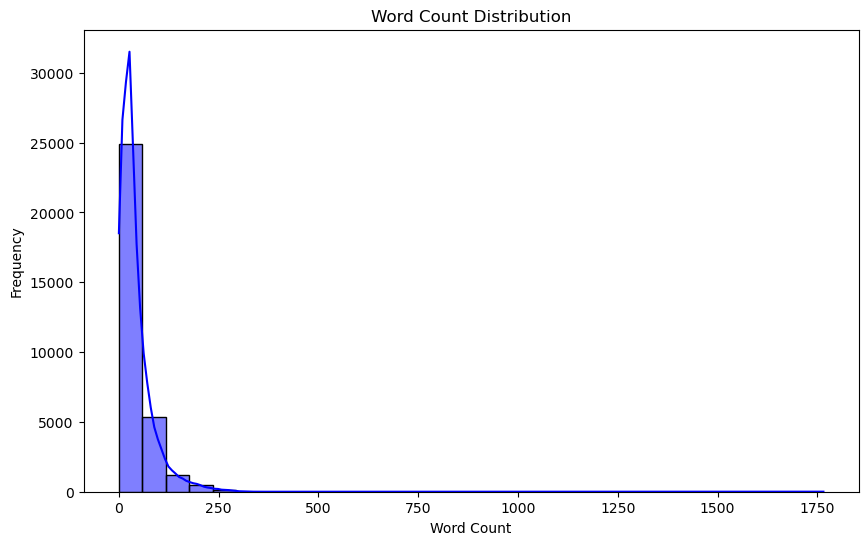

In [56]:
# Visualize Word Count Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], bins=30, kde=True, color='blue')
plt.title("Word Count Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

## Character Count in Text

In [57]:
# Character Count in Text
df['char_count'] = df['Text'].apply(lambda x: len(str(x)))
print("\nCharacter Count Statistics:")
print(df['char_count'].describe())


Character Count Statistics:
count    32124.000000
mean       263.436745
std        228.559029
min          0.000000
25%        130.000000
50%        197.000000
75%        332.000000
max       5656.000000
Name: char_count, dtype: float64


C:\Users\sakth\AppData\Local\Temp\ipykernel_15856\3051103783.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Language', y='char_count', data=df, palette="Set2")


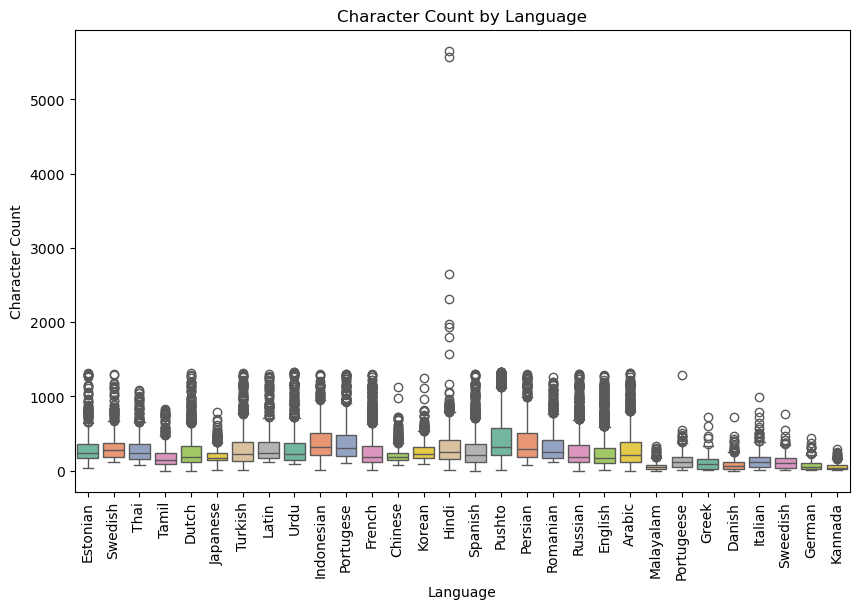

In [58]:
# Visualize Character Count by Language
plt.figure(figsize=(10, 6))
sns.boxplot(x='Language', y='char_count', data=df, palette="Set2")
plt.title("Character Count by Language")
plt.xlabel("Language")
plt.ylabel("Character Count")
plt.xticks(rotation=90)
plt.show()

## Correlation Analysis for Word Count and Character Count

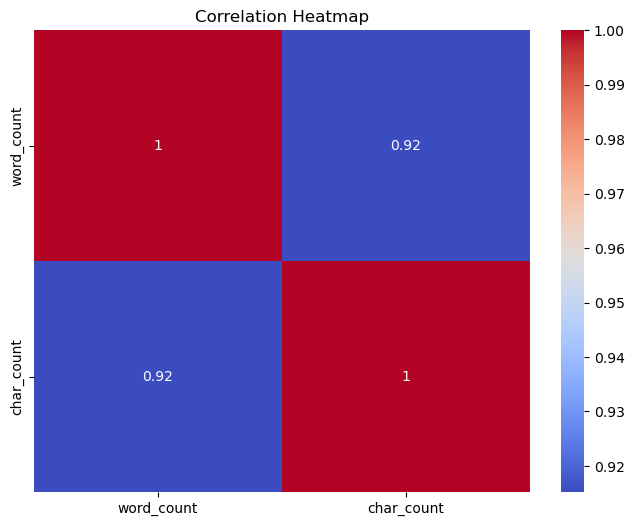

In [59]:
# Correlation Analysis for Word Count and Character Count
plt.figure(figsize=(8, 6))
sns.heatmap(df[['word_count', 'char_count']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Label Encoding

Label Encoding is the process of converting categorical data (e.g., text labels) into numerical values, making it suitable for machine learning models. 

In [60]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Perform label encoding on the 'language' column
df['language_encoded'] = label_encoder.fit_transform(df['Language'])

# Display the mapping of labels to encoded values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Encoding Mapping:", label_mapping)

# Display the first few rows with the encoded column
print(df[['Language', 'language_encoded']].head(20))

Label Encoding Mapping: {'Arabic': np.int64(0), 'Chinese': np.int64(1), 'Danish': np.int64(2), 'Dutch': np.int64(3), 'English': np.int64(4), 'Estonian': np.int64(5), 'French': np.int64(6), 'German': np.int64(7), 'Greek': np.int64(8), 'Hindi': np.int64(9), 'Indonesian': np.int64(10), 'Italian': np.int64(11), 'Japanese': np.int64(12), 'Kannada': np.int64(13), 'Korean': np.int64(14), 'Latin': np.int64(15), 'Malayalam': np.int64(16), 'Persian': np.int64(17), 'Portugeese': np.int64(18), 'Portugese': np.int64(19), 'Pushto': np.int64(20), 'Romanian': np.int64(21), 'Russian': np.int64(22), 'Spanish': np.int64(23), 'Swedish': np.int64(24), 'Sweedish': np.int64(25), 'Tamil': np.int64(26), 'Thai': np.int64(27), 'Turkish': np.int64(28), 'Urdu': np.int64(29)}
      Language  language_encoded
0     Estonian                 5
1      Swedish                24
2         Thai                27
3        Tamil                26
4        Dutch                 3
5     Japanese                12
6      Turki

# Feature extraction

Feature extraction is the process of transforming raw data into meaningful features that can be used for machine learning or analysis. For text data, feature extraction involves converting the textual content into numerical representations.

## TF-IDF (Term Frequency-Inverse Document Frequency)

TF-IDF weighs words by their importance in the dataset.

In [61]:
# Create a TF-IDF model
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Text'])

# Feature names
print("TF-IDF Feature Names:", tfidf_vectorizer.get_feature_names_out())

# Sparse matrix shape
print("TF-IDF Shape:", tfidf_matrix.shape)

TF-IDF Feature Names: ['aa' 'aaa' 'aabdel' ... 'ﻭﻻړﯼ' 'ﻻﺗﺮﺍﻭﺳﻪ' 'ﻻﺳﻮﻧﻪ']
TF-IDF Shape: (32124, 290535)


## Feature Extraction Using TF-IDF Vectorizer

In [62]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf = tfidf_vectorizer.fit_transform(df['Text'])
tfidf_df = pd.DataFrame(tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

tfidf_df

,aan,aantal,aasta,aastal,aastast,aastatel,ab,abad,about,abril,...,하는,하였다,하지만,한다,한편,함께,했다,현재,호드의,힘을
0,0.0,0.0,0.0,0.204956,0.0,0.512448,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32119,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32120,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32121,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32122,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model train:

## Train-Test Split

We will split the dataset into training and testing sets using sklearn’s train_test_split method.

In [63]:
from sklearn.model_selection import train_test_split

# Features (text data) and labels (language)
X = df['Text']  # Input features
y = df['language_encoded']  # Target labels (encoded language column)

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Train set size: 25699
Test set size: 6425


## Train Base Models:

We will train multiple ML algorithms to establish a baseline performance. Since the input text needs numerical representation, we will use `TF-IDF` for feature extraction.

Steps:
* Convert text to numerical format using `TF-IDF`.
* Train multiple classifiers (e.g., `Logistic Regression`, `Naive Bayes`, `Random Forest` & `RidgeClassifier`).
* Evaluate their performance.

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import RidgeClassifier #RidgeClassifier

# Step 1: Transform text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Step 2: Train multiple classifiers
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_tfidf, y_train)
lr_preds = lr_model.predict(X_test_tfidf)

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_preds = nb_model.predict(X_test_tfidf)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)
rf_preds = rf_model.predict(X_test_tfidf)

# RidgeClassifier
rc_model = RidgeClassifier()
rc_model.fit(X_train_tfidf, y_train)
rc_preds = rc_model.predict(X_test_tfidf)

# Evaluate all models
print("\nLogistic Regression Accuracy:", accuracy_score(y_test, lr_preds))
print("\nNaive Bayes Accuracy:", accuracy_score(y_test, nb_preds))
print("\nRandom Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("\nLogistic RidgeClassifier:", accuracy_score(y_test, rc_preds))


Logistic Regression Accuracy: 0.9147081712062257

Naive Bayes Accuracy: 0.8728404669260701

Random Forest Accuracy: 0.8751750972762646

Logistic RidgeClassifier: 0.9335408560311284


C:\Users\sakth\AppData\Local\Temp\ipykernel_15856\1439379071.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette="viridis")


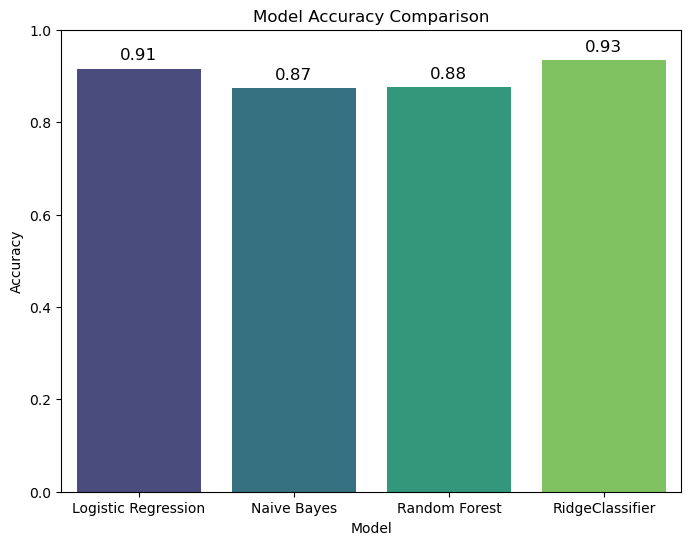

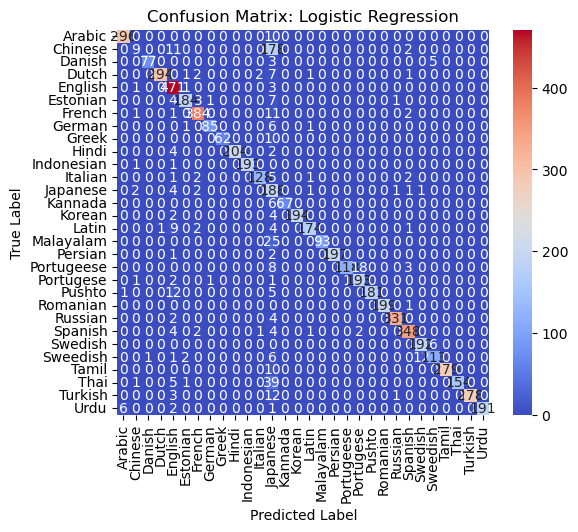

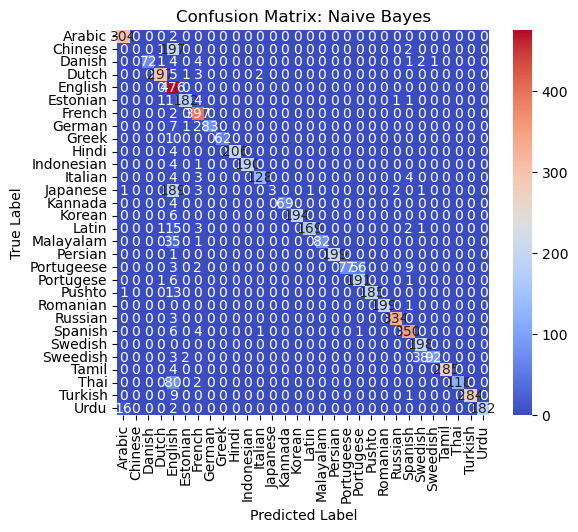

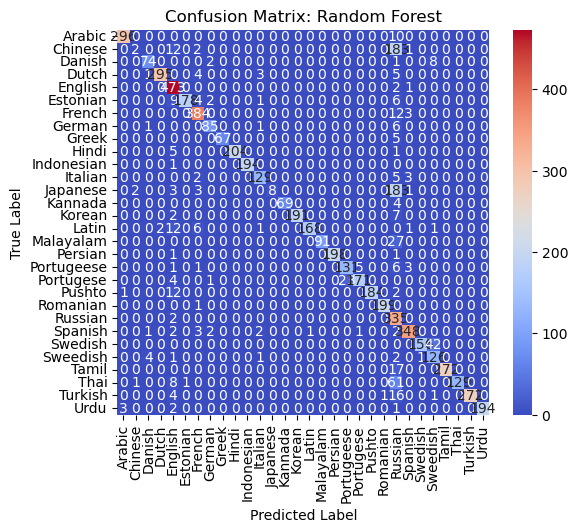

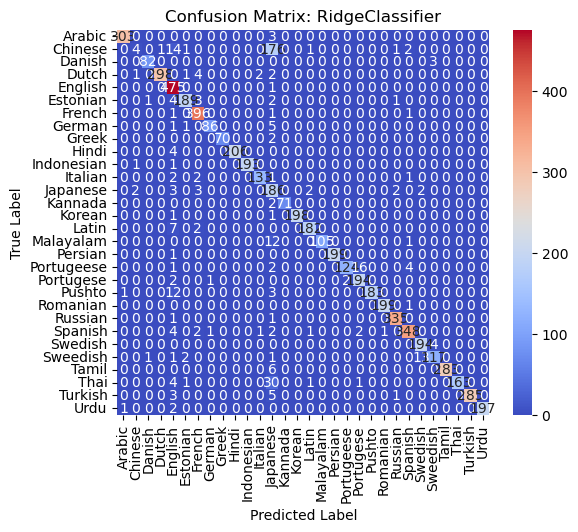

In [65]:
from sklearn.metrics import confusion_matrix

# Accuracy Comparison
model_names = ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'RidgeClassifier']
accuracies = [
    accuracy_score(y_test, lr_preds),
    accuracy_score(y_test, nb_preds),
    accuracy_score(y_test, rf_preds),
    accuracy_score(y_test, rc_preds),
]

# Bar Plot for Accuracy Comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=model_names, y=accuracies, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.ylim(0, 1)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha="center", fontsize=12)
plt.show()

# Confusion Matrices
models = {'Logistic Regression': lr_preds, 'Naive Bayes': nb_preds, 'Random Forest': rf_preds, 'RidgeClassifier':rc_preds }
for model_name, predictions in models.items():
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f"Confusion Matrix: {model_name}")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()


## Compare Performance

We’ll compare the models using metrics like accuracy and the classification report.

In [66]:
# Classification reports for all models
print("\nClassification Report - Logistic Regression:")
print(classification_report(y_test, lr_preds, target_names=label_encoder.classes_))

print("\nClassification Report - Naive Bayes:")
print(classification_report(y_test, nb_preds, target_names=label_encoder.classes_))

print("\nClassification Report - Random Forest:")
print(classification_report(y_test, rf_preds, target_names=label_encoder.classes_))

print("\nClassification Report - RidgeClassifier:")
print(classification_report(y_test, rc_preds, target_names=label_encoder.classes_))


Classification Report - Logistic Regression:
              precision    recall  f1-score   support

      Arabic       0.98      0.97      0.97       306
     Chinese       0.56      0.04      0.08       200
      Danish       0.99      0.91      0.94        85
       Dutch       1.00      0.95      0.98       308
     English       0.87      0.99      0.93       476
    Estonian       0.97      0.92      0.94       200
      French       0.97      0.96      0.96       399
      German       0.98      0.91      0.94        93
       Greek       1.00      0.86      0.93        72
       Hindi       1.00      0.97      0.99       210
  Indonesian       1.00      0.99      0.99       195
     Italian       0.98      0.92      0.95       139
    Japanese       0.34      0.94      0.49       200
     Kannada       1.00      0.92      0.96        73
      Korean       1.00      0.97      0.98       200
       Latin       0.97      0.91      0.94       191
   Malayalam       1.00      0.79  

C:\Users\sakth\anaconda3\envs\lingualsense\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sakth\anaconda3\envs\lingualsense\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sakth\anaconda3\envs\lingualsense\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

### classification report as heatmap


Visualization for Logistic Regression:


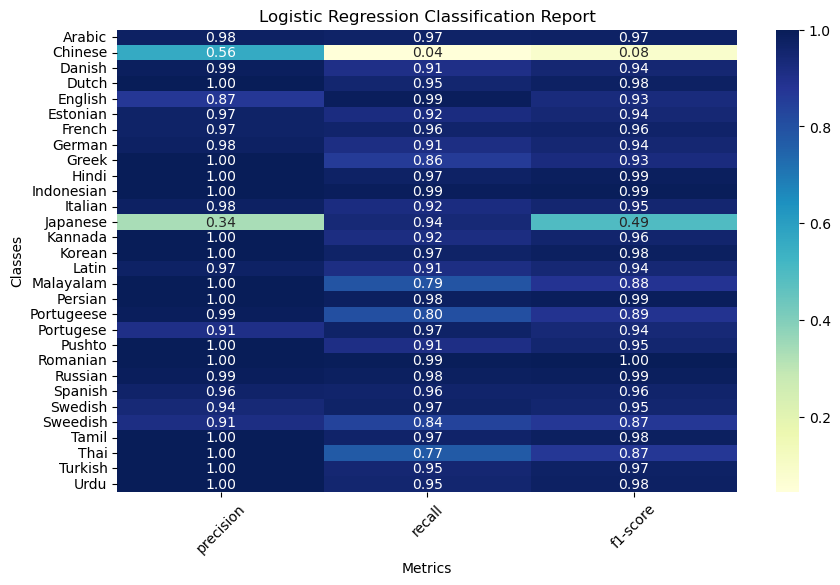


Visualization for Naive Bayes:


C:\Users\sakth\anaconda3\envs\lingualsense\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sakth\anaconda3\envs\lingualsense\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sakth\anaconda3\envs\lingualsense\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

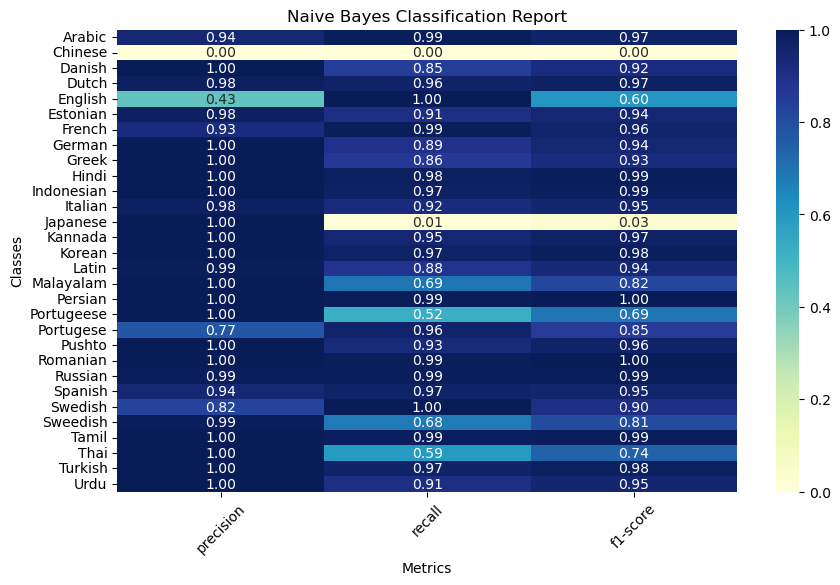


Visualization for Random Forest:


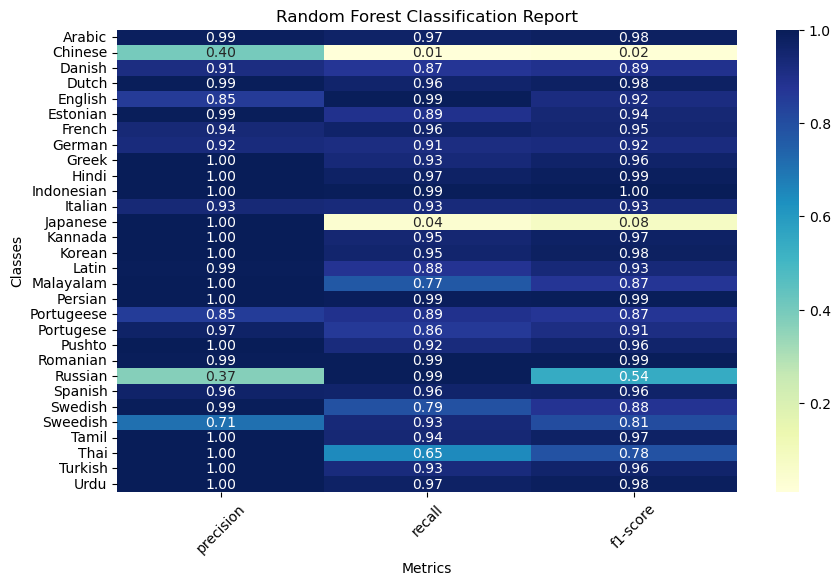


Visualization for RidgeClassifier:


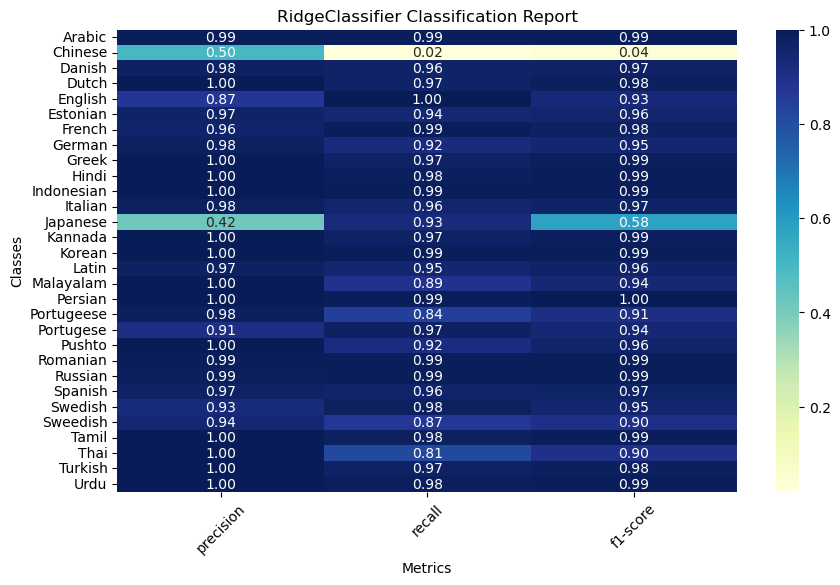

In [67]:
# Function to plot classification report as heatmap
def plot_classification_report(model_name, y_test, y_preds, classes):
    # Generate classification report
    report = classification_report(y_test, y_preds, target_names=classes, output_dict=True)
    
    # Convert to DataFrame
    report_df = pd.DataFrame(report).transpose()
    
    # Keep precision, recall, and F1-score
    metrics_df = report_df[['precision', 'recall', 'f1-score']].iloc[:-3]  # Exclude 'accuracy', 'macro avg', 'weighted avg'
    
    # Plot heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(metrics_df, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
    plt.title(f"{model_name} Classification Report")
    plt.ylabel("Classes")
    plt.xlabel("Metrics")
    plt.xticks(rotation=45)
    plt.show()

# Visualize classification reports for all models
print("\nVisualization for Logistic Regression:")
plot_classification_report("Logistic Regression", y_test, lr_preds, label_encoder.classes_)

print("\nVisualization for Naive Bayes:")
plot_classification_report("Naive Bayes", y_test, nb_preds, label_encoder.classes_)

print("\nVisualization for Random Forest:")
plot_classification_report("Random Forest", y_test, rf_preds, label_encoder.classes_)

print("\nVisualization for RidgeClassifier:")
plot_classification_report("RidgeClassifier", y_test, rc_preds, label_encoder.classes_)


# Data of Prediction

In [75]:
def predict_sentiment(text):
    """
    Predict sentiment using multiple models for the given input text.
    
    Args:
    text (str): The input text for prediction.

    var:
    tfidf_vectorizer (TfidfVectorizer): The TF-IDF vectorizer used to transform the text.
    lr_model (LogisticRegression): The trained Logistic Regression model.
    nb_model (MultinomialNB): The trained Naive Bayes model.
    rf_model (RandomForestClassifier): The trained Random Forest model.
    rc_model (RidgeClassifier): The trained Ridge Classifier model.
    label_encoder (LabelEncoder): The label encoder used to decode model predictions.
    
    Returns:
    None: Prints the predictions from each model.
    """
    # Convert input text to a list (required for the model)
    text = [text]

    # Transform the text using the TF-IDF vectorizer
    text_counts = tfidf_vectorizer.transform(text)

    # Prediction processing for each model
    lr_prediction = lr_model.predict(text_counts)
    nb_prediction = nb_model.predict(text_counts)
    rf_prediction = rf_model.predict(text_counts)
    rc_prediction = rc_model.predict(text_counts)

    # Inverse transform to get the label (original category)
    lr_label = label_encoder.inverse_transform(lr_prediction)[0]
    nb_label = label_encoder.inverse_transform(nb_prediction)[0]
    rf_label = label_encoder.inverse_transform(rf_prediction)[0]
    rc_label = label_encoder.inverse_transform(rc_prediction)[0]

    # Print predictions for the input text
    print("\nPredictions for the input text:")
    print(f"Logistic Regression: {lr_label}")
    print(f"Naive Bayes: {nb_label}")
    print(f"Random Forest: {rf_label}")
    print(f"RidgeClassifier: {rc_label}")

## checking for English text

In [77]:
# Get user input
user_input = input("Enter a sentence for prediction: ")

# Call the function with the user input
predict_sentiment(user_input)

#sample word:"I quite like him.  I'm so in love with him and my heart flutters when I see him."

Enter a sentence for prediction:  I quite like him.  I'm so in love with him and my heart flutters when I see him.



Predictions for the input text:
Logistic Regression: English
Naive Bayes: English
Random Forest: English
RidgeClassifier: English


## checking for Turkish text

In [79]:
# Get user input
user_input = input("Enter a sentence for prediction: ")

# Call the function with the user input
predict_sentiment(user_input)

#sample word:"Türkiye Cumhuriyeti güçlüdür ve ilelebet baki kalacaktır."

Enter a sentence for prediction:  Türkiye Cumhuriyeti güçlüdür ve  ilelebet baki kalacaktır.



Predictions for the input text:
Logistic Regression: Turkish
Naive Bayes: Turkish
Random Forest: Turkish
RidgeClassifier: Turkish


## checking for Tamil text

In [80]:
# Get user input
user_input = input("Enter a sentence for prediction: ")

# Call the function with the user input
predict_sentiment(user_input)

#sample word:"வணக்கம் இது மொழி கண்டறிதல் டெமோ"

Enter a sentence for prediction:  வணக்கம் இது மொழி கண்டறிதல் டெமோ



Predictions for the input text:
Logistic Regression: Tamil
Naive Bayes: Tamil
Random Forest: Tamil
RidgeClassifier: Tamil


## checking for Hindi text

In [81]:
# Get user input
user_input = input("Enter a sentence for prediction: ")

# Call the function with the user input
predict_sentiment(user_input)

#sample word:"हिंदी एक सुंदर भाषा है जिसे भारत में व्यापक रूप से बोला जाता है। यह भारत की राजभाषाओं में से एक है और इसकी लिपि देवनागरी है। हिंदी साहित्य का इतिहास भी बहुत समृद्ध है, जिसमें कई प्रसिद्ध कवि और लेखक शामिल हैं।."

Enter a sentence for prediction:  हिंदी एक सुंदर भाषा है जिसे भारत में व्यापक रूप से बोला जाता है। यह भारत की राजभाषाओं में से एक है और इसकी लिपि देवनागरी है। हिंदी साहित्य का इतिहास भी बहुत समृद्ध है, जिसमें कई प्रसिद्ध कवि और लेखक शामिल हैं।.



Predictions for the input text:
Logistic Regression: Hindi
Naive Bayes: Hindi
Random Forest: Hindi
RidgeClassifier: Hindi


## checking for Chinese text

In [82]:
# Get user input
user_input = input("Enter a sentence for prediction: ")

# Call the function with the user input
predict_sentiment(user_input)

#sample word:"你好，欢迎使用文本分类器！."

Enter a sentence for prediction:  你好，欢迎使用文本分类器！



Predictions for the input text:
Logistic Regression: Japanese
Naive Bayes: English
Random Forest: Russian
RidgeClassifier: Japanese


## checking for French text

In [86]:
# Get user input
user_input = input("Enter a sentence for prediction: ")

# Call the function with the user input
predict_sentiment(user_input)

#sample word:"Les étudiants apprennent le français pour voyager en Europe."

Enter a sentence for prediction:  Les étudiants apprennent le français pour voyager en Europe.



Predictions for the input text:
Logistic Regression: French
Naive Bayes: French
Random Forest: French
RidgeClassifier: French
